In [33]:
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../scripts')
import tuple_to_real

In [34]:
# Global definitions & helper functions

OUTPUT_FILENAME = '../src/output'
DATA_FILENAME   = '../src/output.out'

times = list()
values = list()

def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

In [35]:
# Simulation output processing

tuple_to_real.tuple_to_real(OUTPUT_FILENAME, 0)

with open(DATA_FILENAME, 'r') as f:
    lines = f.readlines()
    
for line in lines:
    time, port, value = line.split(' ')
    times.append(time_to_secs(time))
    values.append(int(value))

In [36]:
# Plotting functions

def plot_pulses(t0=None, t1=None):
    t0 = t0 or times[0]
    t1 = t1 or times[-1]
    interval = list()
    interval_values = list()
    for idx,time in enumerate(times):
        if time > t1:
            break
        if time >= t0:
            interval.append(time)
            interval_values.append(values[idx])
    
    plt.figure(figsize=(15,10))
    plt.plot(interval, interval_values, color='blue', marker='x')
    plt.legend()
    plt.title('Pulse values')
    plt.xlabel('Time [s]')
    plt.ylabel('Value')
    plt.show()    

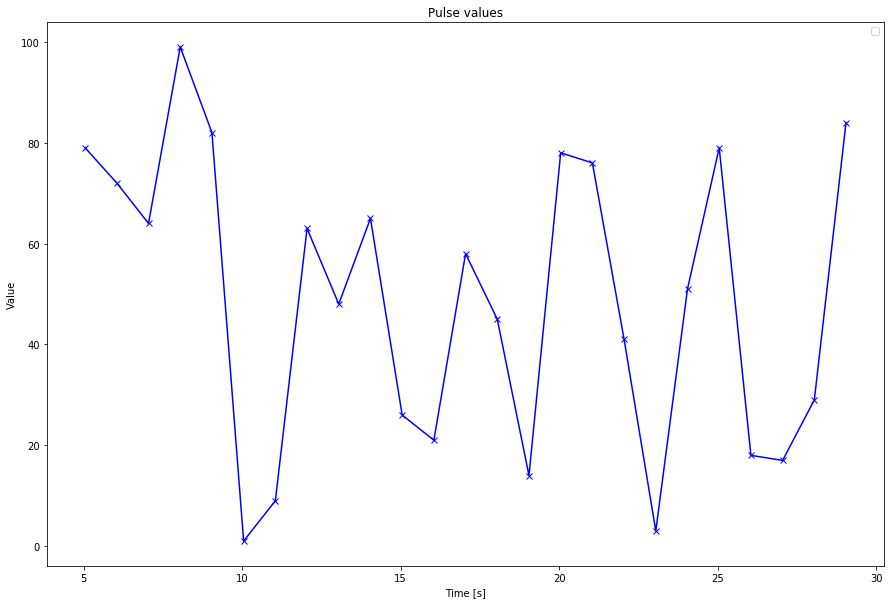

In [37]:
# Graphs & results 

plot_pulses(5, 30)